In [25]:
import pandas as pd 
import numpy as np 
from  stl import mesh

In [26]:
pip install numpy-stl pandas 

Note: you may need to restart the kernel to use updated packages.


In [27]:
stl_file=r'C:\Users\SDS\Downloads\yon0rep7.stl'

In [28]:
def stl_to_dataFrame(stl_filename): 
    mesh_data=mesh.Mesh.from_file(stl_filename)
    vertices= mesh_data.vectors.reshape((-1,3))
    df=pd.DataFrame(vertices,columns=['x','y','z'])

    return df 

In [29]:
df=stl_to_dataFrame(stl_file)

In [30]:
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

from mpl_toolkits.mplot3d import axes3d

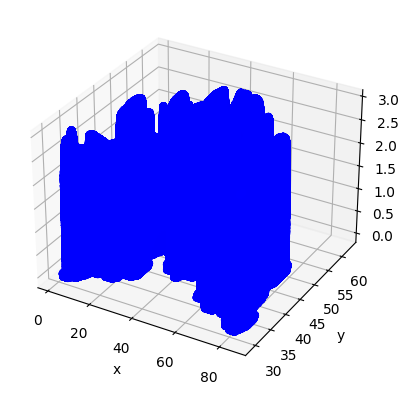

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(df['x'],df['y'],df['z'],c='blue',marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [2]:
pip install trimesh


   ---------------------------------------- 0.0/690.2 kB ? eta -:--:--
    --------------------------------------- 10.2/690.2 kB ? eta -:--:--
   -- ------------------------------------ 41.0/690.2 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/690.2 kB 409.6 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/690.2 kB 393.8 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/690.2 kB 375.8 kB/s eta 0:00:02
   ------ ------------------------------- 122.9/690.2 kB 361.0 kB/s eta 0:00:02
   ------- ------------------------------ 143.4/690.2 kB 370.8 kB/s eta 0:00:02
   -------- ----------------------------- 153.6/690.2 kB 353.1 kB/s eta 0:00:02
   ---------- --------------------------- 194.6/690.2 kB 357.9 kB/s eta 0:00:02
   ---------- --------------------------- 194.6/690.2 kB 357.9 kB/s eta 0:00:02
   ----------- -------------------------- 204.8/690.2 kB 328.1 kB/s eta 0:00:02
   ------------ ------------------------- 235.5/690.2 kB 

In [33]:
df

,x,y,z
0,67.191475,32.794025,0.000114
1,67.157867,32.760406,0.000000
2,67.191475,32.760406,0.000000
3,67.124268,32.760406,0.000000
4,67.191475,32.794025,0.000114
...,...,...,...
2614747,44.374268,40.895878,1.931075
2614748,44.340660,40.929493,1.933624
2614749,39.938519,43.047405,0.469669
2614750,39.938519,43.081024,0.519301


In [10]:
import os
import pandas as pd
import numpy as np
from trimesh import Trimesh
from skimage import measure

def preprocess_stl(stl_file):
    try:
        # Load STL file
        mesh = Trimesh(file=stl_file)
    except Exception as e:
        print(f"Error loading STL file {stl_file}: {e}")
        return None

    # Check if the mesh is empty
    if mesh.is_empty:
        print(f"Empty mesh for STL file {stl_file}")
        return None

    # Scale and normalize
    mesh.apply_scale(0.1)  # Use apply_scale method instead of scale method

    # Ensure consistent orientation
    mesh.fix_normals()

    # Convert to voxel grid
    voxel_grid = trimesh_to_voxel_grid(mesh, voxel_size=0.01)  # Adjust voxel size as needed

    # Create a dictionary with relevant information
    data_dict = {
        'File_Name': os.path.basename(stl_file),
        'Voxel_Grid': voxel_grid,
        # Add other features as needed
    }

    return data_dict

def trimesh_to_voxel_grid(mesh, voxel_size):
    # Calculate bounding box
    min_bound, max_bound = mesh.bounds

    # Calculate voxel grid dimensions
    dimensions = np.ceil((max_bound - min_bound) / voxel_size).astype(int)

    # Create an empty voxel grid
    voxel_grid = np.zeros(dimensions, dtype=bool)

    # Rasterize mesh into voxel grid
    mesh_voxels = measure.mesh_surface_area(mesh.voxelized(pitch=voxel_size))
    voxel_grid[mesh_voxels] = True

    return voxel_grid

def preprocess_batch_stl(folder_path):
    # List all STL files in the specified folder
    stl_files = [file for file in os.listdir(folder_path) if file.endswith('.stl')]

    # Initialize a list to store preprocessed data
    preprocessed_data_list = []

    # Process each STL file
    for stl_file in stl_files:
        stl_file_path = os.path.join(folder_path, stl_file)
        preprocessed_data = preprocess_stl(stl_file_path)
        
        # Check if preprocess_stl returns None
        if preprocessed_data is not None:
            preprocessed_data_list.append(preprocessed_data)

    # Convert the list of dictionaries to a Pandas DataFrame
    df = pd.DataFrame(preprocessed_data_list)

    return df

# Example usage
folder_path = r'C:\Users\SDS\Downloads'
preprocessed_data_df = preprocess_batch_stl(folder_path)




Empty mesh for STL file C:\Users\SDS\Downloads\51rrx8r1.stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv4p7.stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7 (1).stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7 (2).stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7.stl
Empty mesh for STL file C:\Users\SDS\Downloads\voq25d5o (1).stl
Empty mesh for STL file C:\Users\SDS\Downloads\voq25d5o.stl
Empty mesh for STL file C:\Users\SDS\Downloads\yon0rep7.stl


In [14]:
df1=preprocess_batch_stl(folder_path)

Empty mesh for STL file C:\Users\SDS\Downloads\51rrx8r1.stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv4p7.stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7 (1).stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7 (2).stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7.stl
Empty mesh for STL file C:\Users\SDS\Downloads\voq25d5o (1).stl
Empty mesh for STL file C:\Users\SDS\Downloads\voq25d5o.stl
Empty mesh for STL file C:\Users\SDS\Downloads\yon0rep7.stl


In [5]:
pip install scikit-image


     ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.2 MB 640.0 kB/s eta 0:00:07
      --------------------------------------- 0.1/4.2 MB 558.5 kB/s eta 0:00:08
      --------------------------------------- 0.1/4.2 MB 558.5 kB/s eta 0:00:08
      --------------------------------------- 0.1/4.2 MB 435.7 kB/s eta 0:00:10
     - -------------------------------------- 0.1/4.2 MB 450.6 kB/s eta 0:00:09
     - -------------------------------------- 0.2/4.2 MB 482.7 kB/s eta 0:00:09
     - -------------------------------------- 0.2/4.2 MB 499.5 kB/s eta 0:00:09
     - -------------------------------------- 0.2/4.2 MB 478.0 kB/s eta 0:00:09
     -- ------------------------------------- 0.2/4.2 MB 497.3 kB/s eta 0:00:08
     -- ------------------------------------- 0.3/4.2 MB 532.5 kB/s eta 0:00:08
     -- ------------------------------------- 0.3/4.2 MB 519.7 kB/s eta 0:00:08
     -- ------------------------------------- 0.3

In [3]:
folder_path=r'C:\Users\SDS\Downloads'

In [22]:
pip install networkx


     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
      --------------------------------------- 0.0/2.1 MB 259.2 kB/s eta 0:00:08
     - -------------------------------------- 0.1/2.1 MB 409.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/2.1 MB 476.3 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 5

In [25]:
preprocessed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame
